In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
data = pd.read_csv('../data/cocktail_dataset_preprocessed.csv')
data.set_index('id', inplace=True)

In [3]:
data

,alcoholic,IBA,category_Cocktail,category_Ordinary Drink,category_Punch / Party Drink,glass_Brandy snifter,glass_Champagne flute,glass_Cocktail glass,glass_Collins glass,glass_Copper Mug,glass_Highball glass,glass_Old-fashioned glass,glass_Pousse cafe glass,glass_Whiskey Glass,glass_Whiskey sour glass,glass_White wine glass,ingredientInName,instructionsLength,tagsCount,ingredientsCount,classic,gin
id,,,,,,,,,,,,,,,,,,,,,,
11000,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.509804,1.000000,0.75,1,0
11001,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.568627,0.444444,0.50,1,0
11002,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.392157,0.666667,1.00,0,1
11003,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.222222,0.25,1,1
11004,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.294118,0.333333,0.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.078431,0.000000,0.25,0,0
11987,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.078431,0.000000,0.25,0,0
11989,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.215686,0.000000,0.25,0,0


In [4]:

correlation_matrix = data.corr()
print(correlation_matrix)

                              alcoholic       IBA  category_Cocktail  \
alcoholic                           NaN       NaN                NaN   
IBA                                 NaN  1.000000           0.325766   
category_Cocktail                   NaN  0.325766           1.000000   
category_Ordinary Drink             NaN -0.385299          -0.922197   
category_Punch / Party Drink        NaN  0.213327          -0.018773   
glass_Brandy snifter                NaN -0.035245          -0.018773   
glass_Champagne flute               NaN  0.015439          -0.046875   
glass_Cocktail glass                NaN -0.101948           0.098727   
glass_Collins glass                 NaN -0.034021          -0.061484   
glass_Copper Mug                    NaN  0.213327          -0.018773   
glass_Highball glass                NaN  0.037895           0.025891   
glass_Old-fashioned glass           NaN  0.134830          -0.011060   
glass_Pousse cafe glass             NaN -0.050033          -0.02

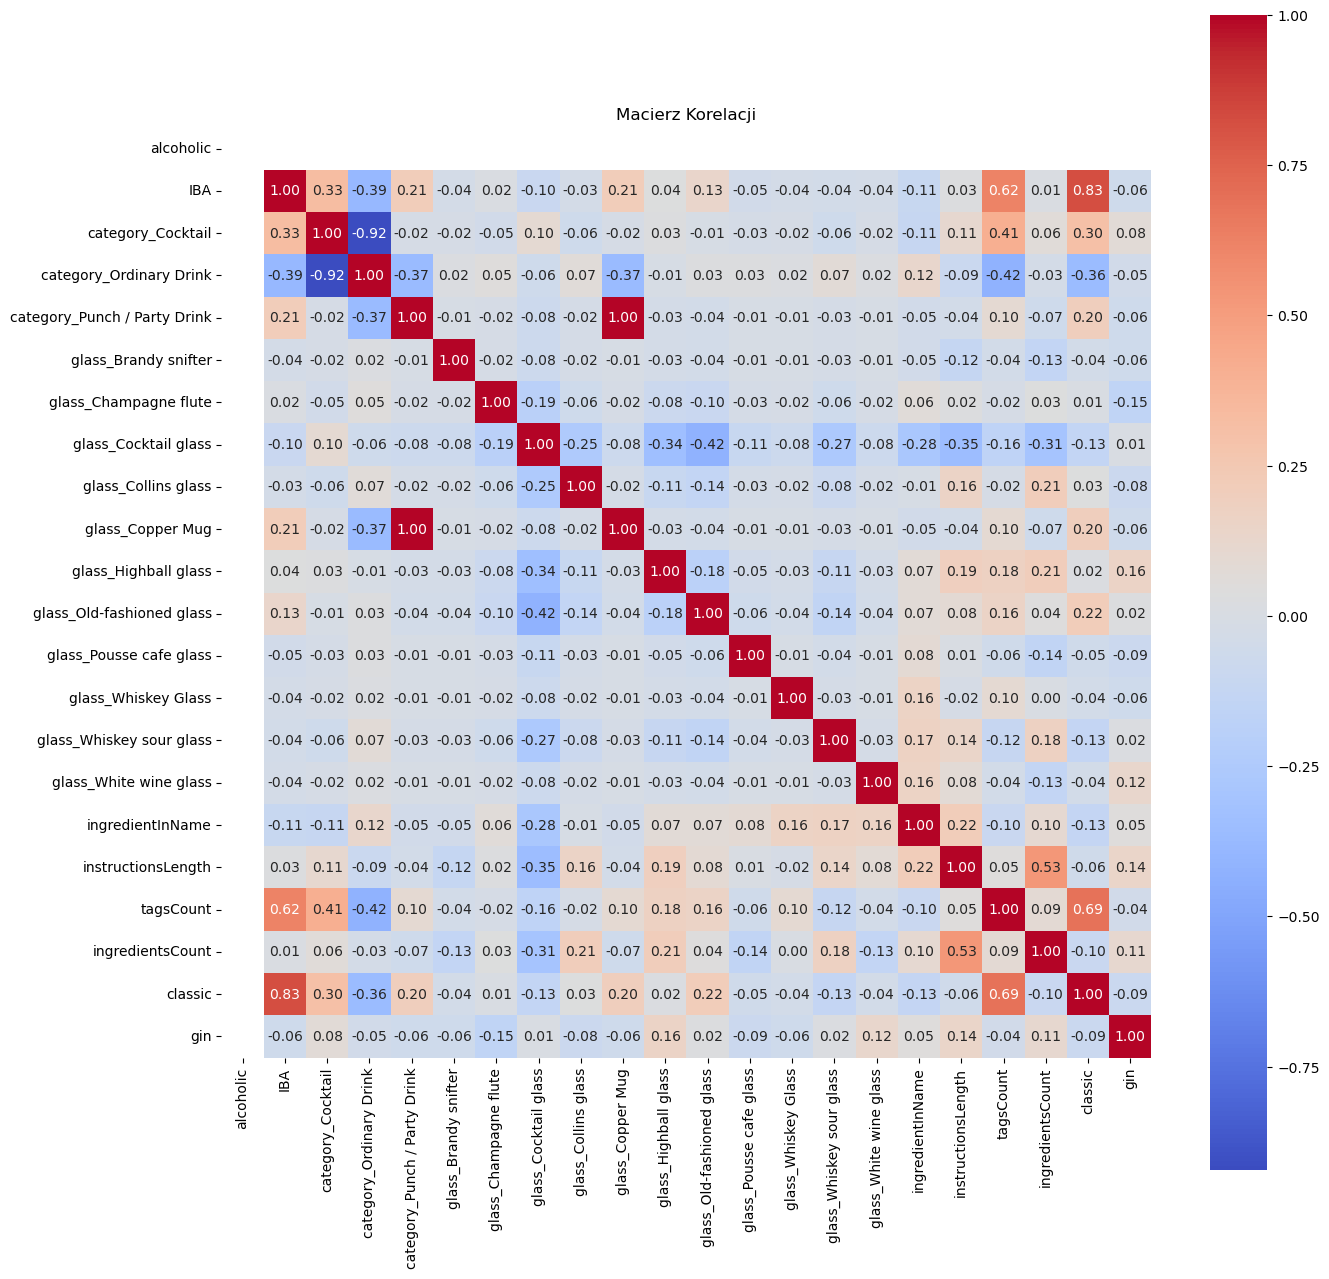

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Macierz Korelacji')
plt.show()

Widać kilka bardziej i mniej oczywistych korelacji. Na przykład fakt, że koktaje oznaczone IBA są pozytywnie skorelowane z tymi classic lub to, że ilość słów w instrukcji rośnie gdy rośnie ilość składników.

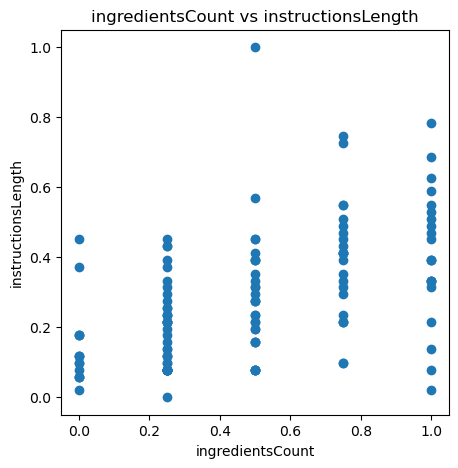

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(data['ingredientsCount'], data['instructionsLength'])
plt.xlabel('ingredientsCount')
plt.ylabel('instructionsLength')

plt.title('ingredientsCount vs instructionsLength')
plt.show()



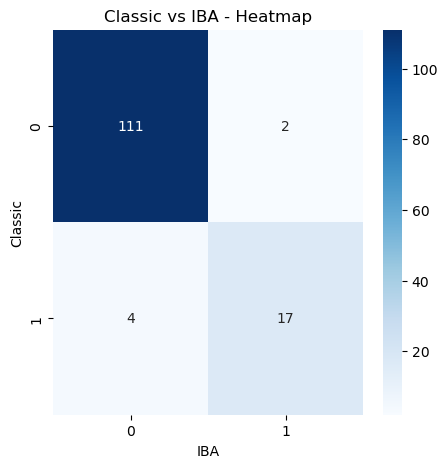

In [7]:
contingency_table = pd.crosstab(data['classic'], data['IBA'])

plt.figure(figsize=(5, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='g')
plt.xlabel('IBA')
plt.ylabel('Classic')
plt.title('Classic vs IBA - Heatmap')
plt.show()


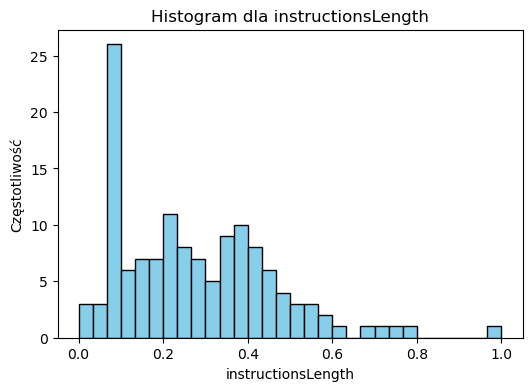

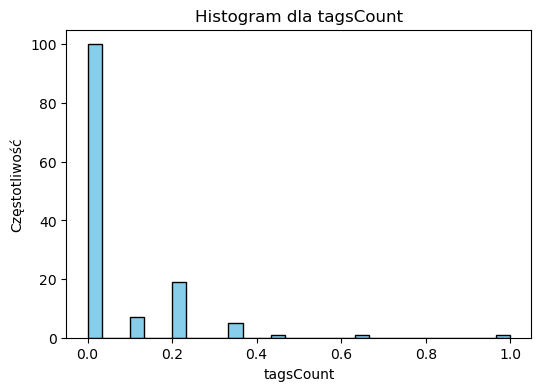

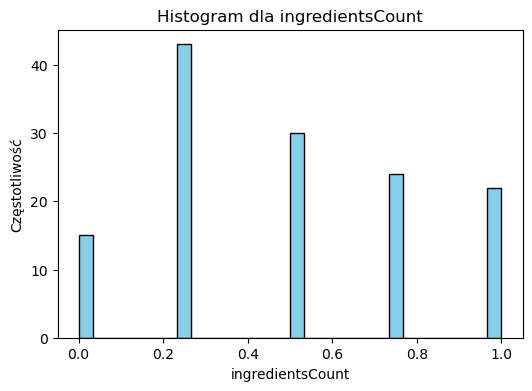

In [8]:
numeric_columns = ['instructionsLength', 'tagsCount', 'ingredientsCount']

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram dla {col}')
    plt.xlabel(col)
    plt.ylabel('Częstotliwość')
    plt.show()


Teraz usunę cechy, które powodowałyby redundancje.

In [9]:
import pandas as pd

correlation_matrix = data.corr()

threshold = 0.7

to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

data_reduced = data.drop(columns=to_drop)

print("Usunięte cechy:", to_drop)


Usunięte cechy: {'category_Ordinary Drink', 'classic', 'glass_Copper Mug'}


In [10]:
# zapisz jako coctail_dataset_reduced.csv
data_reduced.to_csv('../data/cocktail_dataset_reduced.csv')


Kolejna część znajduje się w pliku 5_Clustering.ipynb